In [1]:
import string
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import time
import random as rn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import matplotlib.patches as mpl_patches
from matplotlib import rcParams
from io import StringIO
import matplotlib.tri as mtri
colormap = cm.inferno
plt.rcParams.update({'font.size': 20})

In [2]:
t2 = np.genfromtxt("tri_2.txt", delimiter=" ")
t3 = np.genfromtxt("tri_3.txt", delimiter=" ")

In [3]:
def statistics(data_set, N):
    """function to evaluate mean and variance (for errorbars) of order parameter

    Args:
        data_set (np.ndarray): data set
    """

    n_iterations = len(np.where(data_set[:] == data_set[0,0])[0]) # number of iterations per value of alpha

    len_alpha = len(data_set)//n_iterations

    alpha = np.zeros(len_alpha)
    mean_J = np.zeros(len_alpha)
    mean_c = np.zeros(len_alpha)
    mean_w = np.zeros(len_alpha)
    var_J = np.zeros(len_alpha)
    var_c = np.zeros(len_alpha)
    var_w = np.zeros(len_alpha)

    for n in range(len_alpha):
        alpha[n] = data_set[n * n_iterations, 0]
        J = data_set[n * n_iterations:(n+1) * n_iterations, 1]
        c = data_set[n * n_iterations:(n+1) * n_iterations, 3] * N
        w = data_set[n * n_iterations:(n+1) * n_iterations, 4]
        mean_J[n] = np.mean(J)
        mean_c[n] = np.mean(c)
        mean_w[n] = np.mean(w)

        var_J[n] = np.var(J)
        var_c[n] = np.var(c)
        var_w[n] = np.var(w)
    return alpha, mean_J, var_J, mean_c, var_c, mean_w, var_w


## Triangular for $n_\mathrm{max}=2$

Data set structure is outfile << alp << " " << j << " " << m << " " << s << " " << w << " "

In [4]:
data_low = np.loadtxt('triangular_phi1.00_L50_2.txt') # for triangular at density 0.5
data_high = np.loadtxt('triangular_phi1.50_L50_2.txt') # for triangular at density 0.75
data_ulow = np.loadtxt('triangular_phi0.50_L50_2.txt') # for triangular at density 0.75
data_uulow = np.loadtxt('triangular_phi0.20_L50_2.txt') # for triangular at density 0.75
data_uuulow = np.loadtxt('triangular_phi0.10_L50_2.txt') # for triangular at density 0.75
data_uuuulow = np.loadtxt('triangular_phi0.15_L50_2.txt') # for triangular at density 0.75


print(len(data_ulow))
print(len(data_uulow))
print(len(data_uuulow))
print(len(data_uuuulow))

print(len(data_low))
print(len(data_high))

n_iterations = len(np.where(data_ulow == data_ulow[0,0])[0]) # number of iterations per value of alpha
len_alpha = len(data_ulow)//n_iterations

print(len_alpha, n_iterations, np.where(data_high == data_high[0,0])[0])

491
672
672
672
672
672
23 21 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [5]:
Order_uuulow_t2 = statistics(data_uuulow[0:len_alpha * n_iterations,:], 1)
Order_uuuulow_t2 = statistics(data_uuuulow[0:len_alpha * n_iterations,:], 1)

Order_uulow_t2 = statistics(data_uulow[0:len_alpha * n_iterations,:], 1)
Order_ulow_t2 = statistics(data_ulow[0:len_alpha * n_iterations,:], 1)
Order_low_t2 = statistics(data_low[0:len_alpha * n_iterations,:], 2500)
Order_high_t2 = statistics(data_high[0:len_alpha * n_iterations,:], 3750)

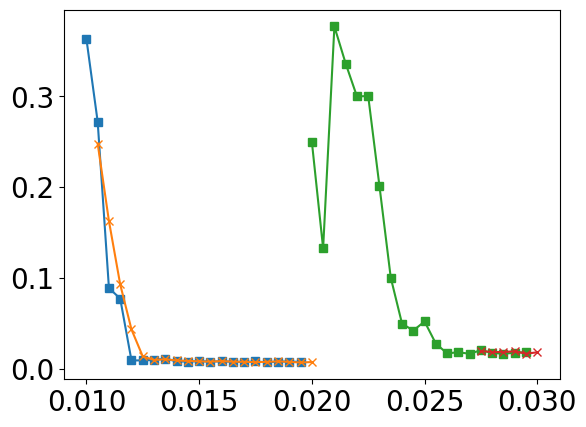

In [6]:
Hyst_forward = np.loadtxt('HystFtriangular_phi0.20_L50_2.txt') # for triangular at density 0.5
Hyst_backward = np.loadtxt('HystBtriangular_phi0.20_L50_2.txt') # for triangular at density 0.5
Hyst_forwardl = np.loadtxt('HystFtriangular_phi0.10_L50_2.txt') # for triangular at density 0.5
Hyst_backwardl = np.loadtxt('HystBtriangular_phi0.10_L50_2.txt') # for triangular at density 0.5
Hyst_forwardld = np.loadtxt('HystFtriangular_phi0.15_L50_2.txt') # for triangular at density 0.5
Hyst_backwardld = np.loadtxt('HystBtriangular_phi0.15_L50_2.txt') # for triangular at density 0.5



# plt.plot(Hyst_forward[:,0], Hyst_forward[:,1], '-s')
# plt.plot(Hyst_backward[:,0], Hyst_backward[:,1], '-x')

plt.plot(Hyst_forwardl[:,0], Hyst_forwardl[:,1], '-s')
plt.plot(Hyst_backwardl[:,0], Hyst_backwardl[:,1], '-x')

plt.plot(Hyst_forwardld[:,0], Hyst_forwardld[:,1], '-s')
plt.plot(Hyst_backwardld[:,0], Hyst_backwardld[:,1], '-x')

0.0688579


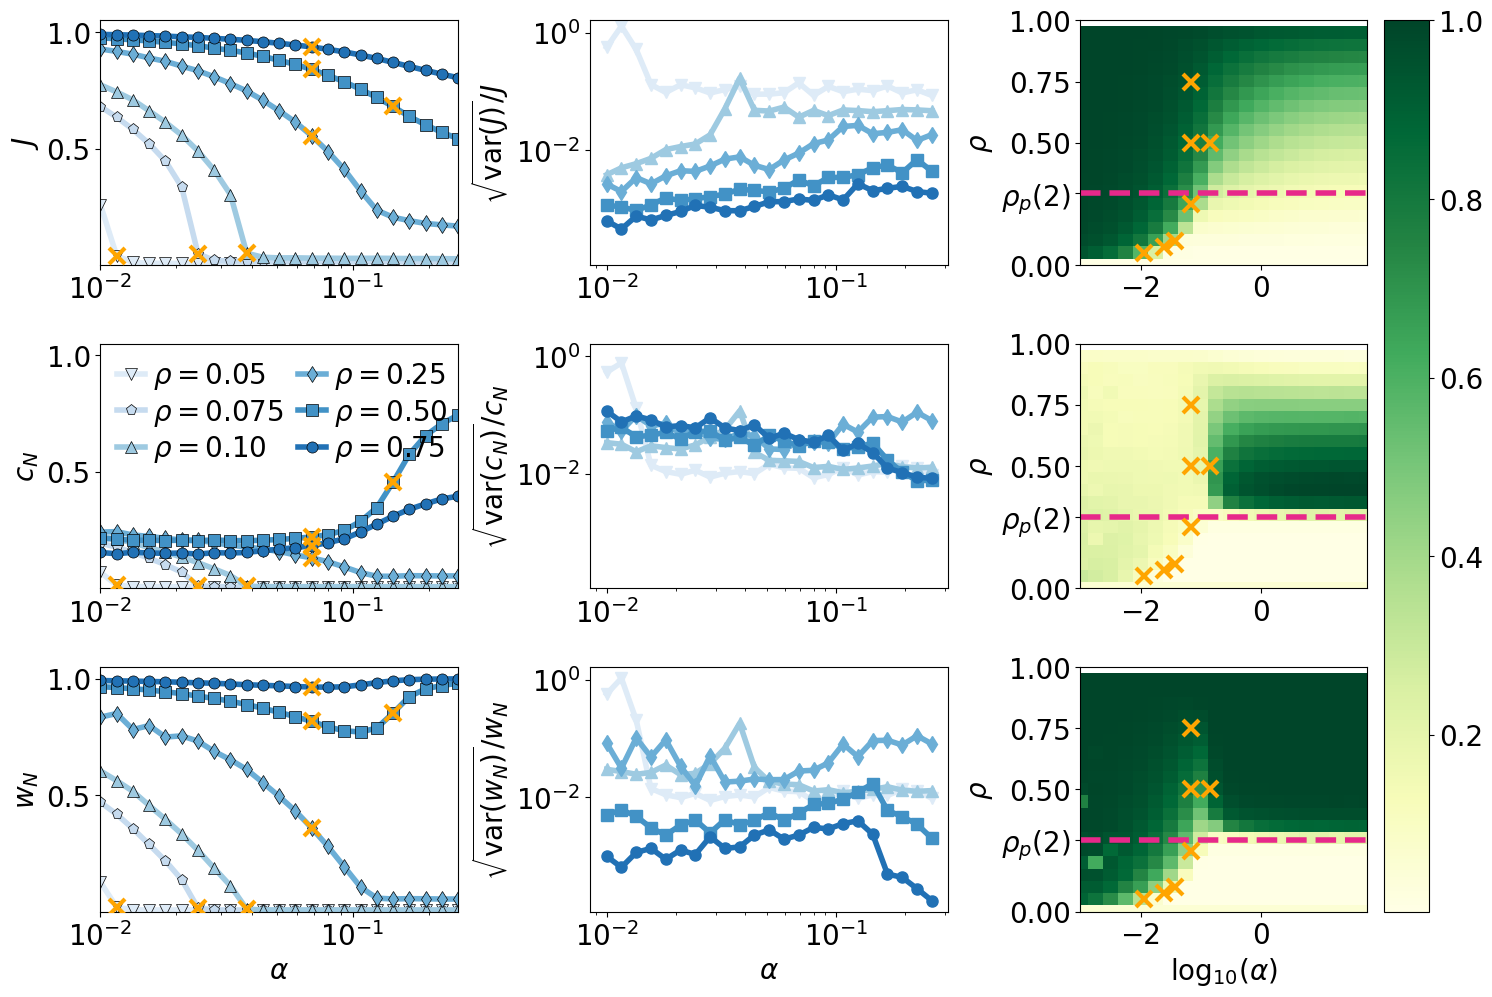

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

plt.tight_layout()


c = ["#deebf7", "#9ecae1", "#6baed6", '#4292c6','#2171b5' , "#c6dbef"]

# ax[0, 0].plot(Order_low_t2[0], np.ones_like(Order_low_t2[0]), color='k', linestyle='solid', ms=8, lw=4)

me = 0.5
me2 = 3

mc2 = 'orange'
mc3 = 'orange'
mc4 = 'orange'

mshape = 'x'


ax[0, 0].plot(Order_low_t2[0], Order_uuulow_t2[1], "v",  color=c[0], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_low_t2[0], Order_uuulow_t2[3], "v", label=r"$\rho=0.05$",color=c[0], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_low_t2[0], Order_uuulow_t2[5], "v", color=c[0], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')



ax[0, 0].plot(Order_low_t2[0], Order_uuuulow_t2[1], "p",  color=c[5], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_low_t2[0], Order_uuuulow_t2[3], "p", label=r"$\rho=0.075$",color=c[5], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_low_t2[0], Order_uuuulow_t2[5], "p", color=c[5], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

ax[0, 0].plot(Order_low_t2[0], Order_uulow_t2[1], "^",  color=c[1], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_low_t2[0], Order_uulow_t2[3], "^", label=r"$\rho=0.10$",color=c[1], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_low_t2[0], Order_uulow_t2[5], "^", color=c[1], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')


ax[0, 0].plot(Order_low_t2[0], Order_ulow_t2[1], "d",  color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_low_t2[0], Order_ulow_t2[3], "d", label=r"$\rho=0.25$",color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_low_t2[0], Order_ulow_t2[5], "d", color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')


ax[0, 0].plot(Order_low_t2[0], Order_low_t2[1], "s",  color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_low_t2[0], Order_low_t2[3], "s", label=r"$\rho=0.50$",color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_low_t2[0], Order_low_t2[5], "s", color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')


ax[0, 0].plot(Order_high_t2[0], Order_high_t2[1], "o",  color=c[4], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_high_t2[0], Order_high_t2[3], "o", label=r"$\rho=0.75$",color=c[4], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_high_t2[0], Order_high_t2[5], "o", color=c[4], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')


ax[0, 0].axis([np.min(Order_low_t2[0]), np.max(Order_low_t2[0]), 1/3750, 1.05])
ax[1, 0].axis([np.min(Order_low_t2[0]), np.max(Order_low_t2[0]), 1/3750, 1.05])
ax[2, 0].axis([np.min(Order_low_t2[0]), np.max(Order_low_t2[0]), 1/3750, 1.05])


ax[1, 0].legend(loc='upper left', frameon=False, labelspacing=0.2, handletextpad=0.3, borderaxespad=0.2, ncol=2, markerscale=1,handlelength=1, columnspacing=0.5)



# markers
ax[0, 0].plot(Order_low_t2[0][1], Order_uuulow_t2[1][1], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='full', zorder=100)
ax[0, 2].plot(np.log10(Order_low_t2[0][1]), 0.05, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[0, 0].plot(Order_low_t2[0][6], Order_uuuulow_t2[1][6], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[0, 2].plot(np.log10(Order_low_t2[0][6]), 0.075, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[0, 0].plot(Order_low_t2[0][9], Order_uulow_t2[1][9], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[0, 2].plot(np.log10(Order_low_t2[0][9]), 0.1, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[0, 0].plot(Order_low_t2[0][13], Order_low_t2[1][13], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[0, 2].plot(np.log10(Order_low_t2[0][13]), 0.5, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[0, 0].plot(Order_low_t2[0][13], Order_high_t2[1][13], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[0, 2].plot(np.log10(Order_low_t2[0][13]), 0.75, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[0, 0].plot(Order_low_t2[0][18], Order_low_t2[1][18], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[0, 2].plot(np.log10(Order_low_t2[0][18]), 0.5, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[0, 0].plot(Order_low_t2[0][13], Order_ulow_t2[1][13], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[0, 2].plot(np.log10(Order_ulow_t2[0][13]), 0.25, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)



ax[2, 0].plot(Order_low_t2[0][1], Order_uuulow_t2[5][1], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[2, 2].plot(np.log10(Order_low_t2[0][1]), 0.05, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[2, 0].plot(Order_low_t2[0][6], Order_uuuulow_t2[5][6], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[2, 2].plot(np.log10(Order_low_t2[0][6]), 0.075, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[2, 0].plot(Order_low_t2[0][9], Order_uulow_t2[5][9], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[2, 2].plot(np.log10(Order_low_t2[0][9]), 0.1, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[2, 0].plot(Order_low_t2[0][13], Order_low_t2[5][13], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[2, 2].plot(np.log10(Order_low_t2[0][13]), 0.5, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[2, 0].plot(Order_low_t2[0][13], Order_high_t2[5][13], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[2, 2].plot(np.log10(Order_low_t2[0][13]), 0.75, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[2, 0].plot(Order_low_t2[0][18], Order_low_t2[5][18], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[2, 2].plot(np.log10(Order_low_t2[0][18]), 0.5, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[2, 0].plot(Order_low_t2[0][13], Order_ulow_t2[5][13], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[2, 2].plot(np.log10(Order_ulow_t2[0][13]), 0.25, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)


ax[1, 0].plot(Order_low_t2[0][1], Order_uuulow_t2[3][1], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[1, 2].plot(np.log10(Order_low_t2[0][1]), 0.05, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[1, 0].plot(Order_low_t2[0][6], Order_uuuulow_t2[3][6], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[1, 2].plot(np.log10(Order_low_t2[0][6]), 0.075, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[1, 0].plot(Order_low_t2[0][9], Order_uulow_t2[3][9], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[1, 2].plot(np.log10(Order_low_t2[0][9]), 0.1, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[1, 0].plot(Order_low_t2[0][13], Order_low_t2[3][13], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[1, 2].plot(np.log10(Order_low_t2[0][13]), 0.5, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[1, 0].plot(Order_low_t2[0][13], Order_high_t2[3][13], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[1, 2].plot(np.log10(Order_low_t2[0][13]), 0.75, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[1, 0].plot(Order_low_t2[0][18], Order_low_t2[3][18], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[1, 2].plot(np.log10(Order_low_t2[0][18]), 0.5, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)
ax[1, 0].plot(Order_low_t2[0][13], Order_ulow_t2[3][13], mshape,  color=mc3, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc2, fillstyle='none', zorder=100)
ax[1, 2].plot(np.log10(Order_ulow_t2[0][13]), 0.25, mshape,  color=mc4, ms=12, lw=4, markeredgewidth=me2, markeredgecolor=mc4, fillstyle='none', zorder=100)







ax[0, 0].set_xscale('log')
ax[1, 0].set_xscale('log')
ax[2, 0].set_xscale('log')

# ax[0, 0].set_yscale('log')
# ax[1, 0].set_yscale('log')
# ax[2, 0].set_yscale('log')



ax[2, 0].set_xlabel(r"$\alpha$")
ax[0, 0].set_ylabel(r"$J$")
ax[1, 0].set_ylabel(r"$c_N$")
ax[2, 0].set_ylabel(r"$w_N$")
# ax[0, 0].legend(loc=(0.01, 0.25))

ax[0,1].errorbar(Order_low_t2[0], np.sqrt(Order_uuulow_t2[2])/Order_uuulow_t2[1], fmt='v', ms=8, color=c[0], linestyle='solid', lw=4)
ax[1,1].errorbar(Order_low_t2[0], np.sqrt(Order_uuulow_t2[4])/Order_uuulow_t2[3], fmt='v', ms=8, color=c[0], linestyle='solid', lw=4)
ax[2,1].errorbar(Order_low_t2[0], np.sqrt(Order_uuulow_t2[6])/Order_uuulow_t2[5], fmt='v', ms=8, color=c[0], linestyle='solid', lw=4)



ax[0,1].errorbar(Order_low_t2[0], np.sqrt(Order_uulow_t2[2])/Order_uulow_t2[1], fmt='^', ms=8, color=c[1], linestyle='solid', lw=4)
ax[1,1].errorbar(Order_low_t2[0], np.sqrt(Order_uulow_t2[4])/Order_uulow_t2[3], fmt='^', ms=8, color=c[1], linestyle='solid', lw=4)
ax[2,1].errorbar(Order_low_t2[0], np.sqrt(Order_uulow_t2[6])/Order_uulow_t2[5], fmt='^', ms=8, color=c[1], linestyle='solid', lw=4)



ax[0,1].errorbar(Order_low_t2[0], np.sqrt(Order_ulow_t2[2])/Order_ulow_t2[1], fmt='d', ms=8, color=c[2], linestyle='solid', lw=4)
ax[1,1].errorbar(Order_low_t2[0], np.sqrt(Order_ulow_t2[4])/Order_ulow_t2[3], fmt='d', ms=8, color=c[2], linestyle='solid', lw=4)
ax[2,1].errorbar(Order_low_t2[0], np.sqrt(Order_ulow_t2[6])/Order_ulow_t2[5], fmt='d', ms=8, color=c[2], linestyle='solid', lw=4)


ax[0,1].errorbar(Order_low_t2[0], np.sqrt(Order_low_t2[2])/Order_low_t2[1], label=r"$J$", fmt='s', ms=8, color=c[3], linestyle='solid', lw=4)
ax[1,1].errorbar(Order_low_t2[0], np.sqrt(Order_low_t2[4])/Order_low_t2[3], label=r"$c_N$", fmt='s', ms=8,color=c[3], linestyle='solid', lw=4)
ax[2,1].errorbar(Order_low_t2[0], np.sqrt(Order_low_t2[6])/Order_low_t2[5], label=r"$w_N$", fmt='s', ms=8,color=c[3], linestyle='solid', lw=4)

ax[0,1].errorbar(Order_high_t2[0], np.sqrt(Order_high_t2[2])/Order_high_t2[1], color=c[4], fmt='o', ms=8,linestyle='solid', lw=4)
ax[1,1].errorbar(Order_high_t2[0], np.sqrt(Order_high_t2[4])/Order_high_t2[3], color=c[4], fmt='o', ms=8,linestyle='solid', lw=4)
ax[2,1].errorbar(Order_high_t2[0], np.sqrt(Order_high_t2[6])/Order_high_t2[5], color=c[4], fmt='o', ms=8,linestyle='solid', lw=4)

ax[2,1].set_xscale('log')
ax[2,1].set_yscale('log')

ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')

ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')


ax[2,1].set_xlabel(r"$\alpha$")
ax[2,1].set_ylabel(r"$\sqrt{\mathrm{var}(w_N)}/w_N$")
ax[1,1].set_ylabel(r"$\sqrt{\mathrm{var}(c_N)}/c_N$")
ax[0,1].set_ylabel(r"$\sqrt{\mathrm{var}(J)}/J$")


ax[0,1].sharey(ax[2,1])
ax[1,1].sharey(ax[2,1])

cmap = plt.get_cmap('YlGn')
plt.set_cmap(cmap)

n = len(t2)
m = len(t2[0, ::4])

rho = np.array([0.001+i*.05 for i in range(m)])
alp = np.array([np.log10(0.001*1.78**i) for i in range(n)])

y, x = np.meshgrid(rho, alp)
c0 = ax[0, 2].pcolormesh(x, y, t2[:, 0::4])
c2 = ax[1, 2].pcolormesh(x, y, t2[:, 2::4])
c = ax[2, 2].pcolormesh(x, y, t2[:, 3::4])

# for i in range(3):
#     ax[i, 2].plot(np.ones(2)*(-0.75), np.array([0.4, 1]),
#                color="red", linewidth=2)
#     ax[i, 2].plot(np.array([-0.4, max(alp)]), np.ones(2)
#                * 0.35, "--", color="red", linewidth=2)
#     ax[i, 2].plot(np.array([-0.75, -0.4]), np.array([0.4, 0.35]),
#                color="red", linewidth=2)
#     ax[i, 2].plot(np.linspace(-3, -0.75), pol(np.linspace(-3, -0.75), -
#                                            3, 0.012, 5)+0.05, color="red", linewidth=2)

fig.colorbar(c, ax=ax[:,2])
for i in range(3):
    ax[i, 2].axis([x.min(), x.max(), y.min(), y.max()])
ax[2, 2].set_xlabel(r"$\log_{10}(\alpha)$")
# ax[0, 2].set_title(r"$J$")
# ax[1, 2].set_title(r"$c_N$")
# ax[2, 2].set_title(r"$w_N$")


for i in range(3):
    ax[i, 2].plot(alp, np.ones_like(alp) * 0.293, color="#e7298a", ls="dashed", lw=4)



ax[0, 2].set_ylabel(r"$\rho$")
ax[1, 2].set_ylabel(r"$\rho$")
ax[2, 2].set_ylabel(r"$\rho$")

ax[0,2].set_yticks([0, 0.293, 0.5, 0.75, 1.0], ["0.00",  r"$\rho_p(2)$", "0.50", "0.75", "1.00"])
ax[1,2].set_yticks([0, 0.293, 0.5, 0.75, 1.0], ["0.00",  r"$\rho_p(2)$", "0.50", "0.75", "1.00"])
ax[2,2].set_yticks([0, 0.293, 0.5, 0.75, 1.0], ["0.00",  r"$\rho_p(2)$", "0.50", "0.75", "1.00"])

print(Order_low_t2[0][13])

In [8]:
scaling20 = np.loadtxt('Scaling_triangular_phi1.00_L20_2.txt') 
scaling30 = np.loadtxt('Scaling_triangular_phi1.00_L30_2.txt')
scaling50 = np.loadtxt('triangular_phi1.00_L50_2.txt') 
scaling80 = np.loadtxt('Scaling_triangular_phi1.00_L80_2.txt')
scaling100 = np.loadtxt('Scaling_triangular_phi1.00_L100_2.txt')

New80 = np.loadtxt('NewScaling_triangular_phi1.00_L80_2.txt')
New100 = np.loadtxt('NewScaling_triangular_phi1.00_L100_2.txt')

Nnew80 = np.loadtxt('NewNewScaling_triangular_phi1.00_L80_2.txt')
Nnew100 = np.loadtxt('NewNewScaling_triangular_phi1.00_L100_2.txt')




# N80 = statistics(New80, 1)
# N100 = statistics(New100, 1)

print(len(Nnew80), len(Nnew100))
print(len(New80), len(New100))
n80 = np.concatenate((Nnew80[:-3],New80))
n100 = np.concatenate((Nnew100,New100))

Nn80 = statistics(n80, 1)
Nn100 = statistics(n100, 1)

print(len(Nn80[0]), len(Nn100[0]))


n_iterations = len(np.where(scaling20 == scaling20[0,0])[0]) # number of iterations per value of alpha
len_alpha = np.min(np.array([len(scaling20), len(scaling30), len(scaling50)]))//n_iterations

print(len_alpha, n_iterations)

print(np.array([len(scaling20), len(scaling30), len(scaling50), len(scaling80), len(scaling100)]))

75 56
56 64
32 30
32 21
[672 672 672 563 424]


In [9]:
scal20 = statistics(scaling20[0:len_alpha * n_iterations,:], 1)
scal30 = statistics(scaling30[0:len_alpha * n_iterations,:], 1)
# scal80 = statistics(scaling80[0:len_alpha * n_iterations,:], 1)
# scal100 = statistics(scaling100[0:len_alpha * n_iterations,:], 1)

scal50 = statistics(scaling50[0:len_alpha * n_iterations,:], 2500)



In [10]:
def Gap(a):
    min_index = np.argmin(a)
    Init_gap = a[0] - a[min_index]
    final_gap = a[-1] - a[min_index]
    max_gap_before = np.max(a[:min_index]) - a[min_index]
    max_gap_after = np.max(a[min_index:]) - a[min_index]
    return Init_gap, final_gap, max_gap_before, max_gap_after

gap20 = Gap(scal20[5])
gap30 = Gap(scal30[5])
gap50 = Gap(scal50[5])
gap80 = Gap(Nn80[5])
gap100 = Gap(Nn100[5])

L = np.array([20,30,50,80,100])
Linv = np.array([1/20,1/30,1/50,1/80,1/100])
ingap = np.array([gap20[0], gap30[0], gap50[0], gap80[0], gap100[0]])
fingap = np.array([gap20[1], gap30[1], gap50[1], gap80[1], gap100[1]])
maxgapB = np.array([gap20[2], gap30[2], gap50[2], gap80[2], gap100[2]])
maxgapA = np.array([gap20[3], gap30[3], gap50[3], gap80[3], gap100[3]])


In [11]:
def fit(x, a, b):
    return b * x ** a

def fit2(x, a, b):
    return b * np.log10(a * x)


exp_fit = opt.curve_fit(fit, L, np.array([scal20[3][0],scal30[3][0],scal50[3][0],Nn80[3][0], Nn100[3][0]]), p0=(1, 1))
g_fit = opt.curve_fit(fit2, L, ingap, p0=(1, 1))
g2_fit = opt.curve_fit(fit2, L, fingap, p0=(1, 1))


print(exp_fit[0])
print(g_fit[0])
print(g2_fit[0])

[-0.54389284  1.81137869]
[0.08947353 0.29824508]
[0.10918976 0.30330374]


/tmp/ipykernel_5476/2538929712.py:5: RuntimeWarning: invalid value encountered in log10
  return b * np.log10(a * x)


Text(0.5, 338.4869281045751, '$L$')

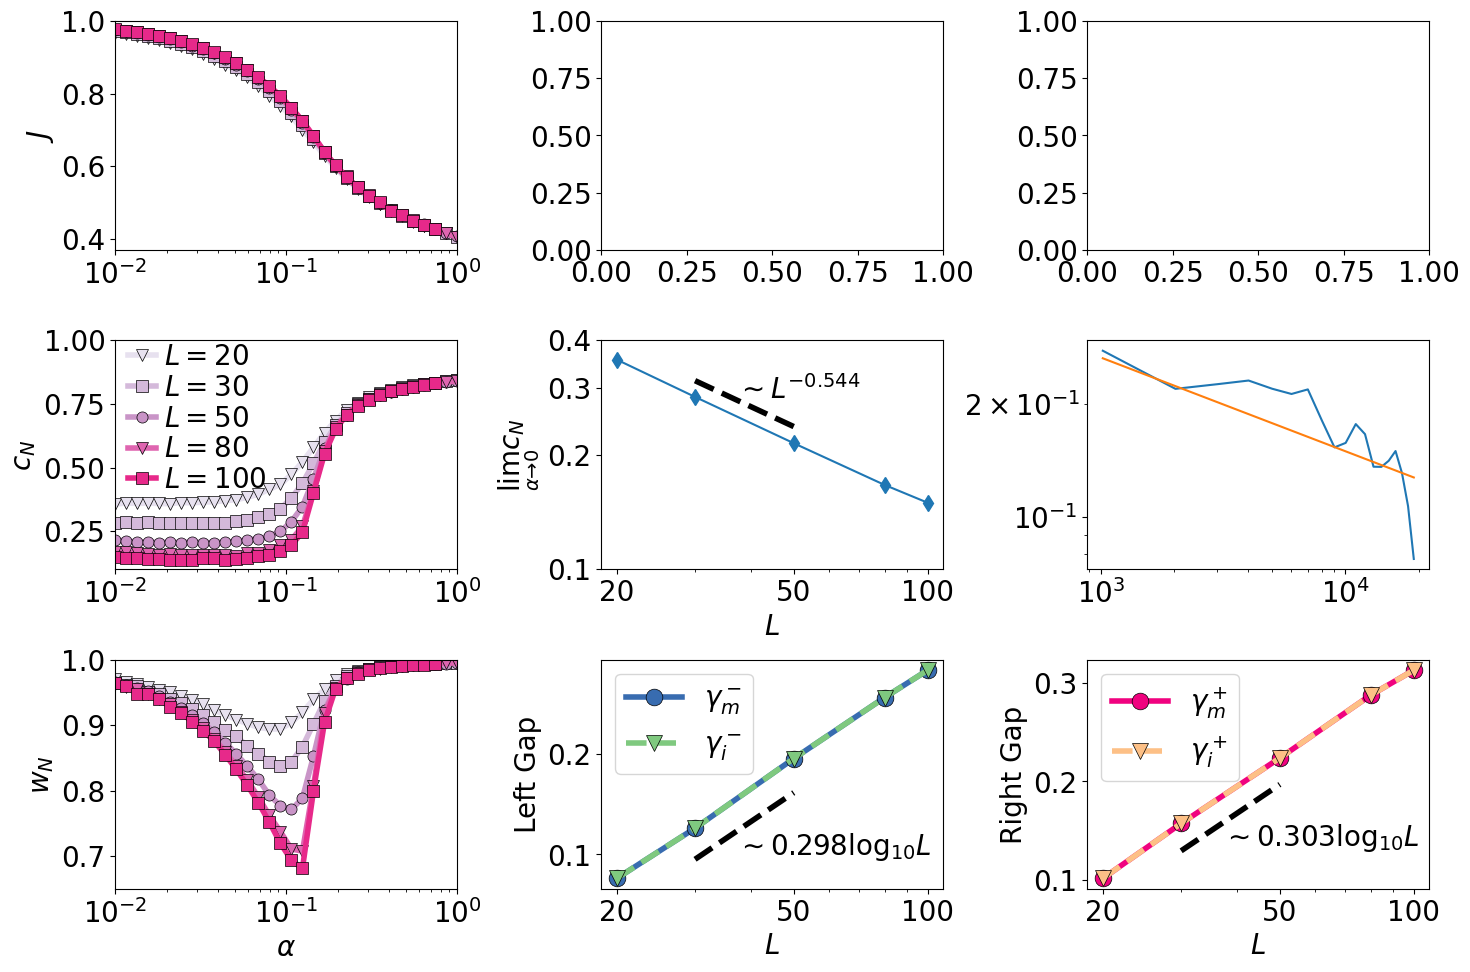

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

plt.tight_layout(pad=1.5)


c = ["#e7e1ef", "#c994c7", "#df65b0", '#e7298a','#ce1256' , "#d4b9da"]

# ax[0, 0].plot(Order_low_t2[0], np.ones_like(Order_low_t2[0]), color='k', linestyle='solid', ms=8, lw=4)

me = 0.5
me2 = 3

mc2 = 'orange'
mc3 = 'orange'
mc4 = 'orange'

mshape = 'x'


ax[0, 0].plot(scal20[0], scal20[1], "v",  color=c[0], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(scal20[0], scal20[3], "v", label=r"$L=20$",color=c[0], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(scal20[0], scal20[5], "v", color=c[0], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

ax[0, 0].plot(scal30[0], scal30[1], "s",  color=c[5], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(scal30[0], scal30[3], "s", label=r"$L=30$",color=c[5], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(scal30[0], scal30[5], "s", color=c[5], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

ax[0, 0].plot(scal50[0], scal50[1], "o",  color=c[1], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(scal50[0], scal50[3], "o", label=r"$L=50$",color=c[1], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(scal50[0], scal50[5], "o", color=c[1], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

# ax[0, 0].plot(scal80[0], scal80[1], "d",  color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[1, 0].plot(scal80[0], scal80[3], "d", label=r"$L=80$",color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[2, 0].plot(scal80[0], scal80[5], "d", color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

# ax[0, 0].plot(scal100[0], scal100[1], "h",  color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[1, 0].plot(scal100[0], scal100[3], "h", label=r"$L=100$",color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[2, 0].plot(scal100[0], scal100[5], "h", color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

ax[1,1].plot(L, [scal20[3][0],scal30[3][0],scal50[3][0],Nn80[3][0], Nn100[3][0]], "-d", ms=8)
ax[1,1].plot(L[1:3], fit(L[1:3], exp_fit[0][0], exp_fit[0][1]*1.1), "k--", lw=4)
ax[1,1].annotate(r"$\sim L^{%.3f}$" % exp_fit[0][0], xy=(37, 0.28), xytext=(37, 0.28))
# ax[1,1].plot(L[-2:], [Nn80[3][0], Nn100[3][0]], "-d", ms=8)


# ax[0, 0].plot(N80[0], N80[1], "v",  color='r', linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[1, 0].plot(N80[0], N80[3], "v", label=r"$L=N80$",color='r', linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[2, 0].plot(N80[0], N80[5], "v", color='r', linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

# ax[0, 0].plot(N100[0], N100[1], "s",  color='g', linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[1, 0].plot(N100[0], N100[3], "s", label=r"$L=N100$",color='g', linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[2, 0].plot(N100[0], N100[5], "s", color='g', linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

ax[0, 0].plot(Nn80[0], Nn80[1], "v",  color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Nn80[0], Nn80[3], "v", label=r"$L=80$",color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Nn80[0], Nn80[5], "v", color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

ax[0, 0].plot(Nn100[0], Nn100[1], "s",  color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Nn100[0], Nn100[3], "s", label=r"$L=100$",color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Nn100[0], Nn100[5], "s", color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')


ax[1,1].set_yscale('log')
ax[1,1].set_xscale('log')


ax[2,1].plot(L, maxgapB, "-o",color="#386cb0",label=r"$\gamma_m^-$",ms=12, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2,2].plot(L, maxgapA, "-o",color="#f0027f",label=r"$\gamma_m^+$",ms=12, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2,1].plot(L, ingap, "--v",color="#7fc97f",label=r"$\gamma_i^-$",ms=12, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2,2].plot(L, fingap, "--v",color="#fdc086",label=r"$\gamma_i^+$",ms=12, lw=4, markeredgewidth=me, markeredgecolor='k')

ax[2,1].legend()
ax[2,2].legend()
ax[1,0].legend(loc=(0.6*10**(-2), .28), frameon=False, labelspacing=0.1, handletextpad=0.3, borderaxespad=0.2, ncol=1, markerscale=1,handlelength=1, columnspacing=0.5)


# ax[0, 0].axis([np.min(scal100[0]), np.max(scal100[0]), 1/10000, 1.05])
# ax[1, 0].axis([np.min(scal100[0]), np.max(scal100[0]), 1/10000, 1.05])
# ax[2, 0].axis([np.min(scal100[0]), np.max(scal100[0]), 1/10000, 1.05])

ax[0, 0].set_xscale('log')
# ax[0, 0].set_yscale('log')
ax[1, 0].set_xscale('log')
ax[2, 0].set_xscale('log')



ax[2, 1].set_xscale('log')
ax[2, 2].set_xscale('log')



ax[1, 2].plot(rho[1:]*100**2*2, t2[:, 2::4][0][1:])
ax[1,2].plot(rho[1:]*100**2*2, np.sqrt(np.sqrt(1/(rho[1:]*100**2*2)))*1.5)

ax[1,2].set_yscale('log')
ax[1,2].set_xscale('log')

lab = ['20',  "50", "100"]
# ax[2,2].set_xticks(np.array([20, 50, 100]), labels=lab)
ax[2,1].set_xticks([20, 50, 100], lab)
ax[2,1].set_xticks(np.arange(20, 110, 10), labels=['' for i in np.arange(20, 110, 10)], minor=True)

ax[2,2].set_xticks([20, 50, 100], lab)
ax[2,2].set_xticks(np.arange(20, 110, 10), labels=['' for i in np.arange(20, 110, 10)], minor=True)

ax[1,1].set_xticks([20, 50, 100], lab)
ax[1,1].set_xticks(np.arange(20, 110, 10), labels=['' for i in np.arange(20, 110, 10)], minor=True)

ax[1,1].set_yticks([0.1, .2, .3, .4], ["0.1", "0.2", "0.3", "0.4"])
# ax[1,1].set_xticks(np.arange(20, 110, 10), labels=['' for i in np.arange(20, 110, 10)], minor=True)

ax[0,0].axis([10**(-2),1,.37,1.0])
ax[1,0].axis([10**(-2),1,.1,1.0])
ax[2,0].axis([10**(-2),1,.65,1.0])

ax[2, 1].plot(L[1:3], fit2(L[1:3], g_fit[0][0]-0.02, g_fit[0][1]), "k--", lw=4)
ax[2, 1].annotate(r"$\sim {%.3f}\log_{10}L$" % g_fit[0][1], xy=(37, 0.1), xytext=(37, 0.1))

ax[2, 2].plot(L[1:3], fit2(L[1:3], g2_fit[0][0]-0.02, g2_fit[0][1]), "k--", lw=4)
ax[2, 2].annotate(r"$\sim {%.3f}\log_{10}L$" % g2_fit[0][1], xy=(37, 0.135), xytext=(37, 0.135))



ax[0,0].set_ylabel(r"$J$")
ax[1,0].set_ylabel(r"$c_N$")
ax[2,0].set_ylabel(r"$w_N$")

ax[2,0].set_xlabel(r"$\alpha$")
ax[2,1].set_xlabel(r"$L$")
ax[2,2].set_xlabel(r"$L$")

ax[2,1].set_ylabel(r"Left Gap")
ax[2,2].set_ylabel(r"Right Gap")


ax[1,1].set_ylabel(r"$\lim_{\alpha\to0} c_N$")
ax[1,1].set_xlabel(r"$L$")

32


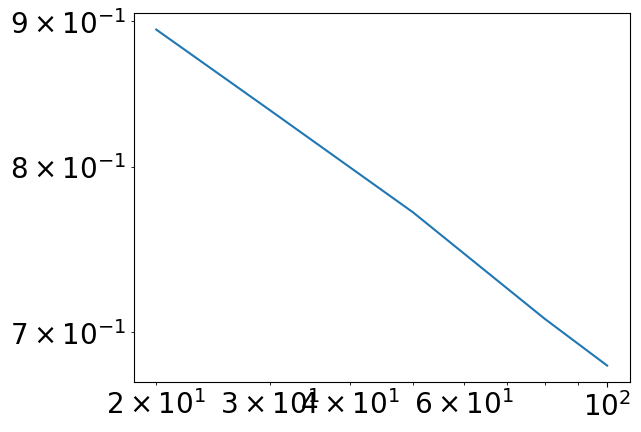

In [17]:
plt.plot(L, [np.min(scal20[5]), np.min(scal30[5]), np.min(scal50[5]), np.min(Nn80[5]), np.min(Nn100[5])])
plt.xscale('log')
plt.yscale('log')
print(len(scal50[5]))

## Triangular for $n_\mathrm{max}=3$

Data set structure is outfile << alp << " " << j << " " << m << " " << s << " " << w << " "

In [154]:
data_low = np.loadtxt('triangular_phi1.50_L50_3.txt') # for triangular at density 0.5
data_high = np.loadtxt('triangular_phi2.25_L50_3.txt') # for triangular at density 0.75
data_uulow = np.loadtxt('triangular_phi0.30_L50_3.txt') # for triangular at density 0.5
data_ulow = np.loadtxt('triangular_phi0.75_L50_3.txt') # for triangular at density 0.5




print(len(data_low))
print(len(data_high))
print(len(data_ulow))
print(len(data_uulow))



n_iterations = np.min(np.array([len(np.where(data_ulow == data_ulow[0,0])[0]), len(np.where(data_uulow == data_uulow[0,0])[0])])) # number of iterations per value of alpha
len_alpha = np.min(np.array([len(data_ulow), len(data_uulow)]))//n_iterations

print(len_alpha, n_iterations, len(np.where(data_ulow == data_ulow[0,0])[0]), len(np.where(data_uulow == data_uulow[0,0])[0]))

625
578
443
672
21 21 21 21


In [155]:

Order_ulow_t3 = statistics(data_ulow[0:len_alpha * n_iterations,:], 1)
Order_uulow_t3 = statistics(data_uulow[0:len_alpha * n_iterations,:], 1)

Order_low_t3 = statistics(data_low[0:len_alpha * n_iterations,:], 3750)
Order_high_t3 = statistics(data_high[0:len_alpha * n_iterations,:], 5625)

print(np.shape(Order_low_t3), np.shape(Order_uulow_t3), np.shape(Order_ulow_t3), np.shape(Order_high_t3))

(7, 21) (7, 21) (7, 21) (7, 21)


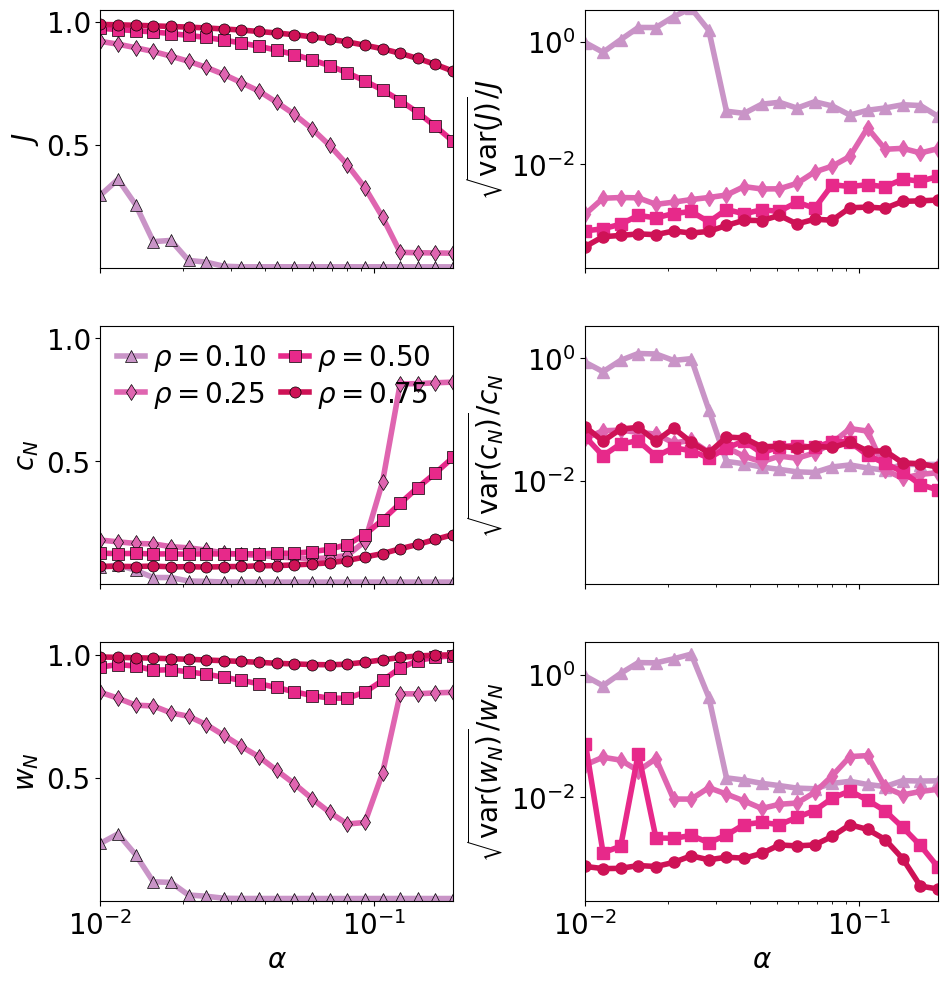

In [156]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), sharex=True)

plt.tight_layout()


c = ["#e7e1ef", "#c994c7", "#df65b0", '#e7298a','#ce1256' , "#d4b9da"]

# ax[0, 0].plot(Order_low_t2[0], np.ones_like(Order_low_t2[0]), color='k', linestyle='solid', ms=8, lw=4)

me = 0.5

# ax[0, 0].plot(Order_low_t3[0], Order_uuulow_t2[1], "v",  color=c[0], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[1, 0].plot(Order_low_t3[0], Order_uuulow_t2[3], "v", label=r"$\rho=0.05$",color=c[0], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[2, 0].plot(Order_low_t3[0], Order_uuulow_t2[5], "v", color=c[0], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

# ax[0, 0].plot(Order_low_t3[0], Order_uuuulow_t2[1], "p",  color=c[5], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[1, 0].plot(Order_low_t3[0], Order_uuuulow_t2[3], "p", label=r"$\rho=0.075$",color=c[5], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
# ax[2, 0].plot(Order_low_t3[0], Order_uuuulow_t2[5], "p", color=c[5], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')

ax[0, 0].plot(Order_low_t3[0], Order_uulow_t3[1], "^",  color=c[1], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_low_t3[0], Order_uulow_t3[3], "^", label=r"$\rho=0.10$",color=c[1], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_low_t3[0], Order_uulow_t3[5], "^", color=c[1], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')


ax[0, 0].plot(Order_low_t3[0], Order_ulow_t3[1], "d",  color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_low_t3[0], Order_ulow_t3[3], "d", label=r"$\rho=0.25$",color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_low_t3[0], Order_ulow_t3[5], "d", color=c[2], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')


ax[0, 0].plot(Order_low_t3[0], Order_low_t3[1], "s",  color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_low_t3[0], Order_low_t3[3], "s", label=r"$\rho=0.50$",color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_low_t3[0], Order_low_t3[5], "s", color=c[3], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')


ax[0, 0].plot(Order_high_t3[0], Order_high_t3[1], "o",  color=c[4], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[1, 0].plot(Order_high_t3[0], Order_high_t3[3], "o", label=r"$\rho=0.75$",color=c[4], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')
ax[2, 0].plot(Order_high_t3[0], Order_high_t3[5], "o", color=c[4], linestyle='solid', ms=8, lw=4, markeredgewidth=me, markeredgecolor='k')


ax[0, 0].axis([np.min(Order_low_t3[0]), np.max(Order_low_t3[0]), 1/5625, 1.05])
ax[1, 0].axis([np.min(Order_low_t3[0]), np.max(Order_low_t3[0]), 1/5625, 1.05])
ax[2, 0].axis([np.min(Order_low_t3[0]), np.max(Order_low_t3[0]), 1/5625, 1.05])


ax[1, 0].legend(loc='upper left', frameon=False, labelspacing=0.2, handletextpad=0.3, borderaxespad=0.2, ncol=2, markerscale=1,handlelength=1, columnspacing=0.5)


ax[0, 0].set_xscale('log')
ax[1, 0].set_xscale('log')
ax[2, 0].set_xscale('log')

# ax[0, 0].set_yscale('log')
# ax[1, 0].set_yscale('log')
# ax[2, 0].set_yscale('log')



ax[2, 0].set_xlabel(r"$\alpha$")
ax[0, 0].set_ylabel(r"$J$")
ax[1, 0].set_ylabel(r"$c_N$")
ax[2, 0].set_ylabel(r"$w_N$")
# ax[0, 0].legend(loc=(0.01, 0.25))

# ax[0,1].errorbar(Order_low_t3[0], np.sqrt(Order_uuulow_t3[2])/Order_uuulow_t3[1], fmt='v', ms=8, color=c[0], linestyle='solid', lw=4)
# ax[1,1].errorbar(Order_low_t3[0], np.sqrt(Order_uuulow_t3[4])/Order_uuulow_t3[3], fmt='v', ms=8, color=c[0], linestyle='solid', lw=4)
# ax[2,1].errorbar(Order_low_t3[0], np.sqrt(Order_uuulow_t3[6])/Order_uuulow_t3[5], fmt='v', ms=8, color=c[0], linestyle='solid', lw=4)



ax[0,1].errorbar(Order_low_t3[0], np.sqrt(Order_uulow_t3[2])/Order_uulow_t3[1], fmt='^', ms=8, color=c[1], linestyle='solid', lw=4)
ax[1,1].errorbar(Order_low_t3[0], np.sqrt(Order_uulow_t3[4])/Order_uulow_t3[3], fmt='^', ms=8, color=c[1], linestyle='solid', lw=4)
ax[2,1].errorbar(Order_low_t3[0], np.sqrt(Order_uulow_t3[6])/Order_uulow_t3[5], fmt='^', ms=8, color=c[1], linestyle='solid', lw=4)



ax[0,1].errorbar(Order_low_t3[0], np.sqrt(Order_ulow_t3[2])/Order_ulow_t3[1], fmt='d', ms=8, color=c[2], linestyle='solid', lw=4)
ax[1,1].errorbar(Order_low_t3[0], np.sqrt(Order_ulow_t3[4])/Order_ulow_t3[3], fmt='d', ms=8, color=c[2], linestyle='solid', lw=4)
ax[2,1].errorbar(Order_low_t3[0], np.sqrt(Order_ulow_t3[6])/Order_ulow_t3[5], fmt='d', ms=8, color=c[2], linestyle='solid', lw=4)


ax[0,1].errorbar(Order_low_t3[0], np.sqrt(Order_low_t3[2])/Order_low_t3[1], label=r"$J$", fmt='s', ms=8, color=c[3], linestyle='solid', lw=4)
ax[1,1].errorbar(Order_low_t3[0], np.sqrt(Order_low_t3[4])/Order_low_t3[3], label=r"$c_N$", fmt='s', ms=8,color=c[3], linestyle='solid', lw=4)
ax[2,1].errorbar(Order_low_t3[0], np.sqrt(Order_low_t3[6])/Order_low_t3[5], label=r"$w_N$", fmt='s', ms=8,color=c[3], linestyle='solid', lw=4)

ax[0,1].errorbar(Order_high_t3[0], np.sqrt(Order_high_t3[2])/Order_high_t3[1], color=c[4], fmt='o', ms=8,linestyle='solid', lw=4)
ax[1,1].errorbar(Order_high_t3[0], np.sqrt(Order_high_t3[4])/Order_high_t3[3], color=c[4], fmt='o', ms=8,linestyle='solid', lw=4)
ax[2,1].errorbar(Order_high_t3[0], np.sqrt(Order_high_t3[6])/Order_high_t3[5], color=c[4], fmt='o', ms=8,linestyle='solid', lw=4)

ax[2,1].set_xscale('log')
ax[2,1].set_yscale('log')

ax[0,1].set_yscale('log')
ax[1,1].set_yscale('log')


ax[2,1].set_xlabel(r"$\alpha$")
ax[2,1].set_ylabel(r"$\sqrt{\mathrm{var}(w_N)}/w_N$")
ax[1,1].set_ylabel(r"$\sqrt{\mathrm{var}(c_N)}/c_N$")
ax[0,1].set_ylabel(r"$\sqrt{\mathrm{var}(J)}/J$")


ax[0,1].sharey(ax[2,1])
ax[1,1].sharey(ax[2,1])

In [24]:
Order_high_t3[5]

array([0.99074829, 0.9892649 , 0.98769343, 0.98588038, 0.98365867,
       0.98142352, 0.97843571, 0.97563762, 0.97241181, 0.96905643,
       0.96509038, 0.96249986, 0.96011086, 0.95900133, 0.96144633,
       0.96960157, 0.97914871, 0.98868557, 0.99483095, 0.99832938,
       0.99925   , 0.99971229, 0.999916  , 0.99996681, 0.99997657,
       0.99999352, 0.9999911 ])